# ANLY-590 Assignment 1
## Hanlong Peng

## 1. Feedforward: Building a ReLu 2 layer neural network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

The first and second part of problem 1 is in the graph below. If the graph died, you can find it in from the url or my github repository https://github.com/peng9001/ANLY-590/tree/master/assignments

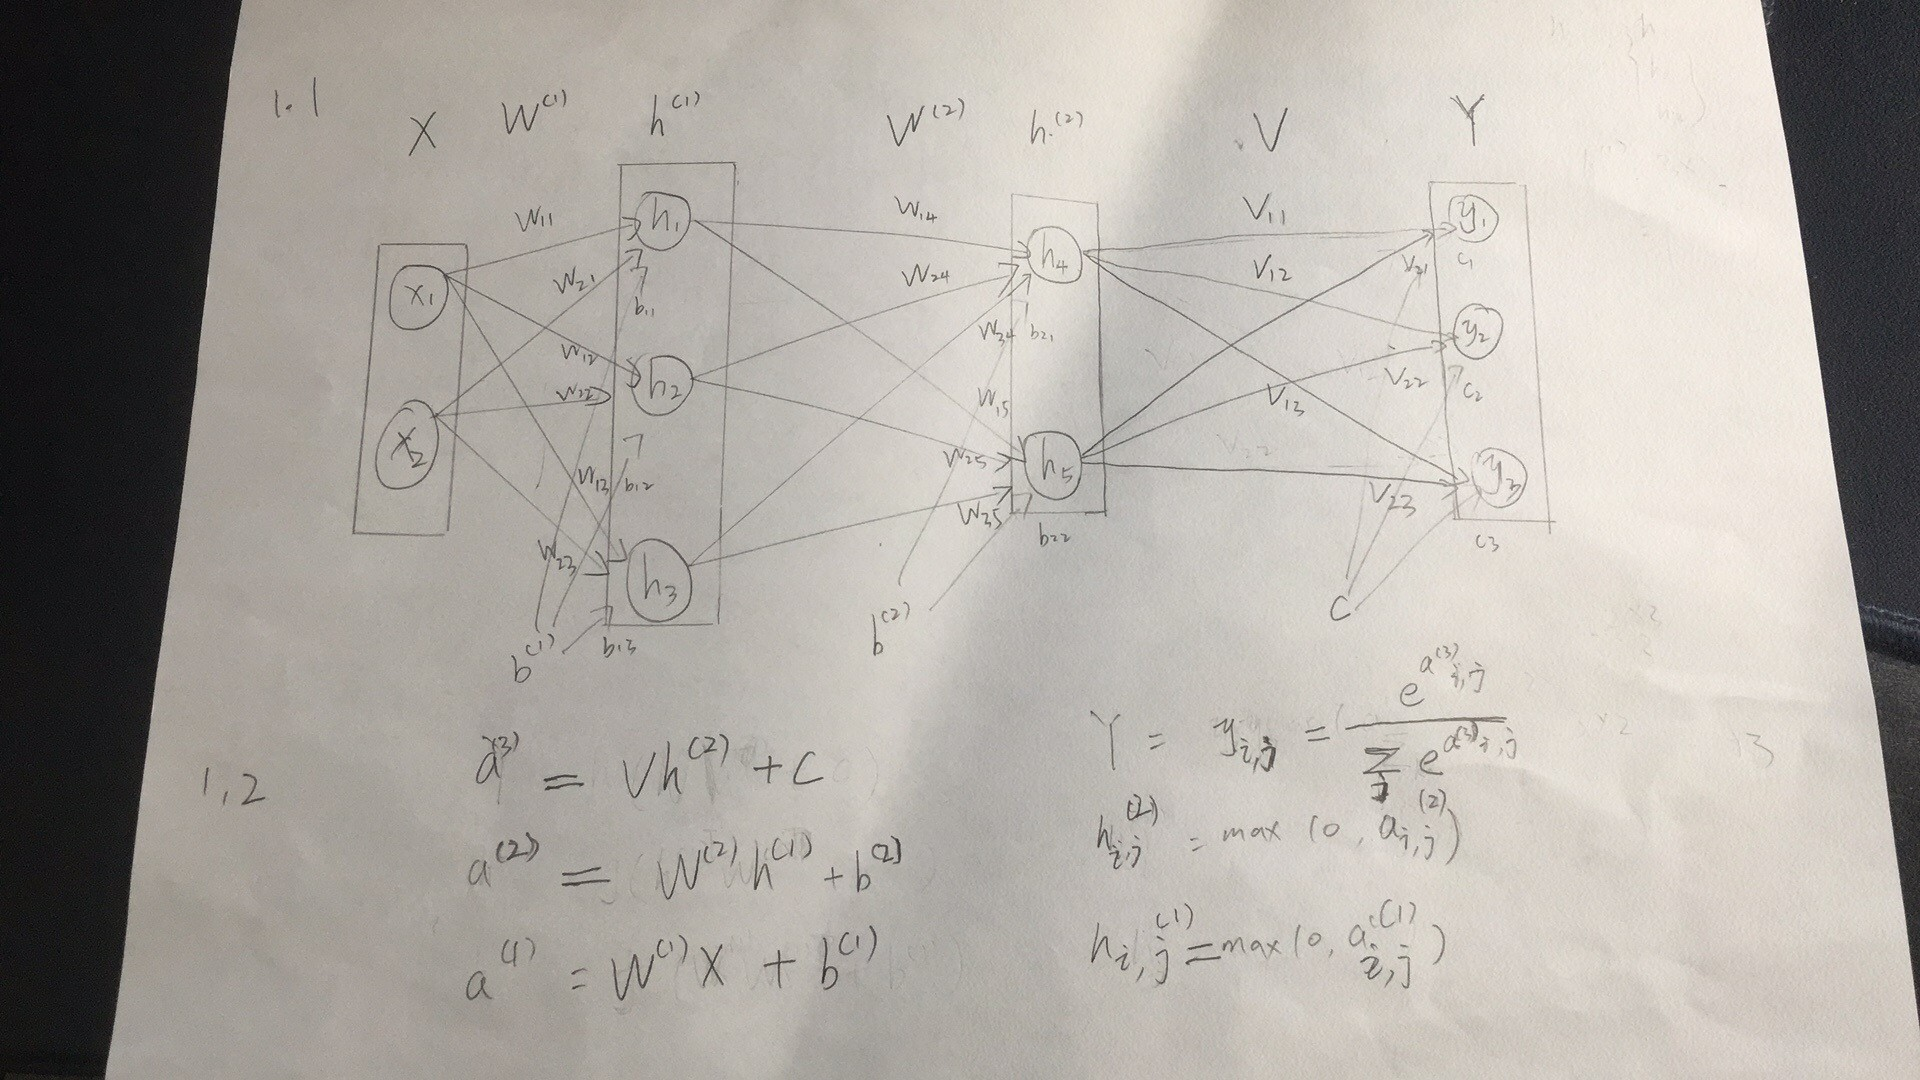

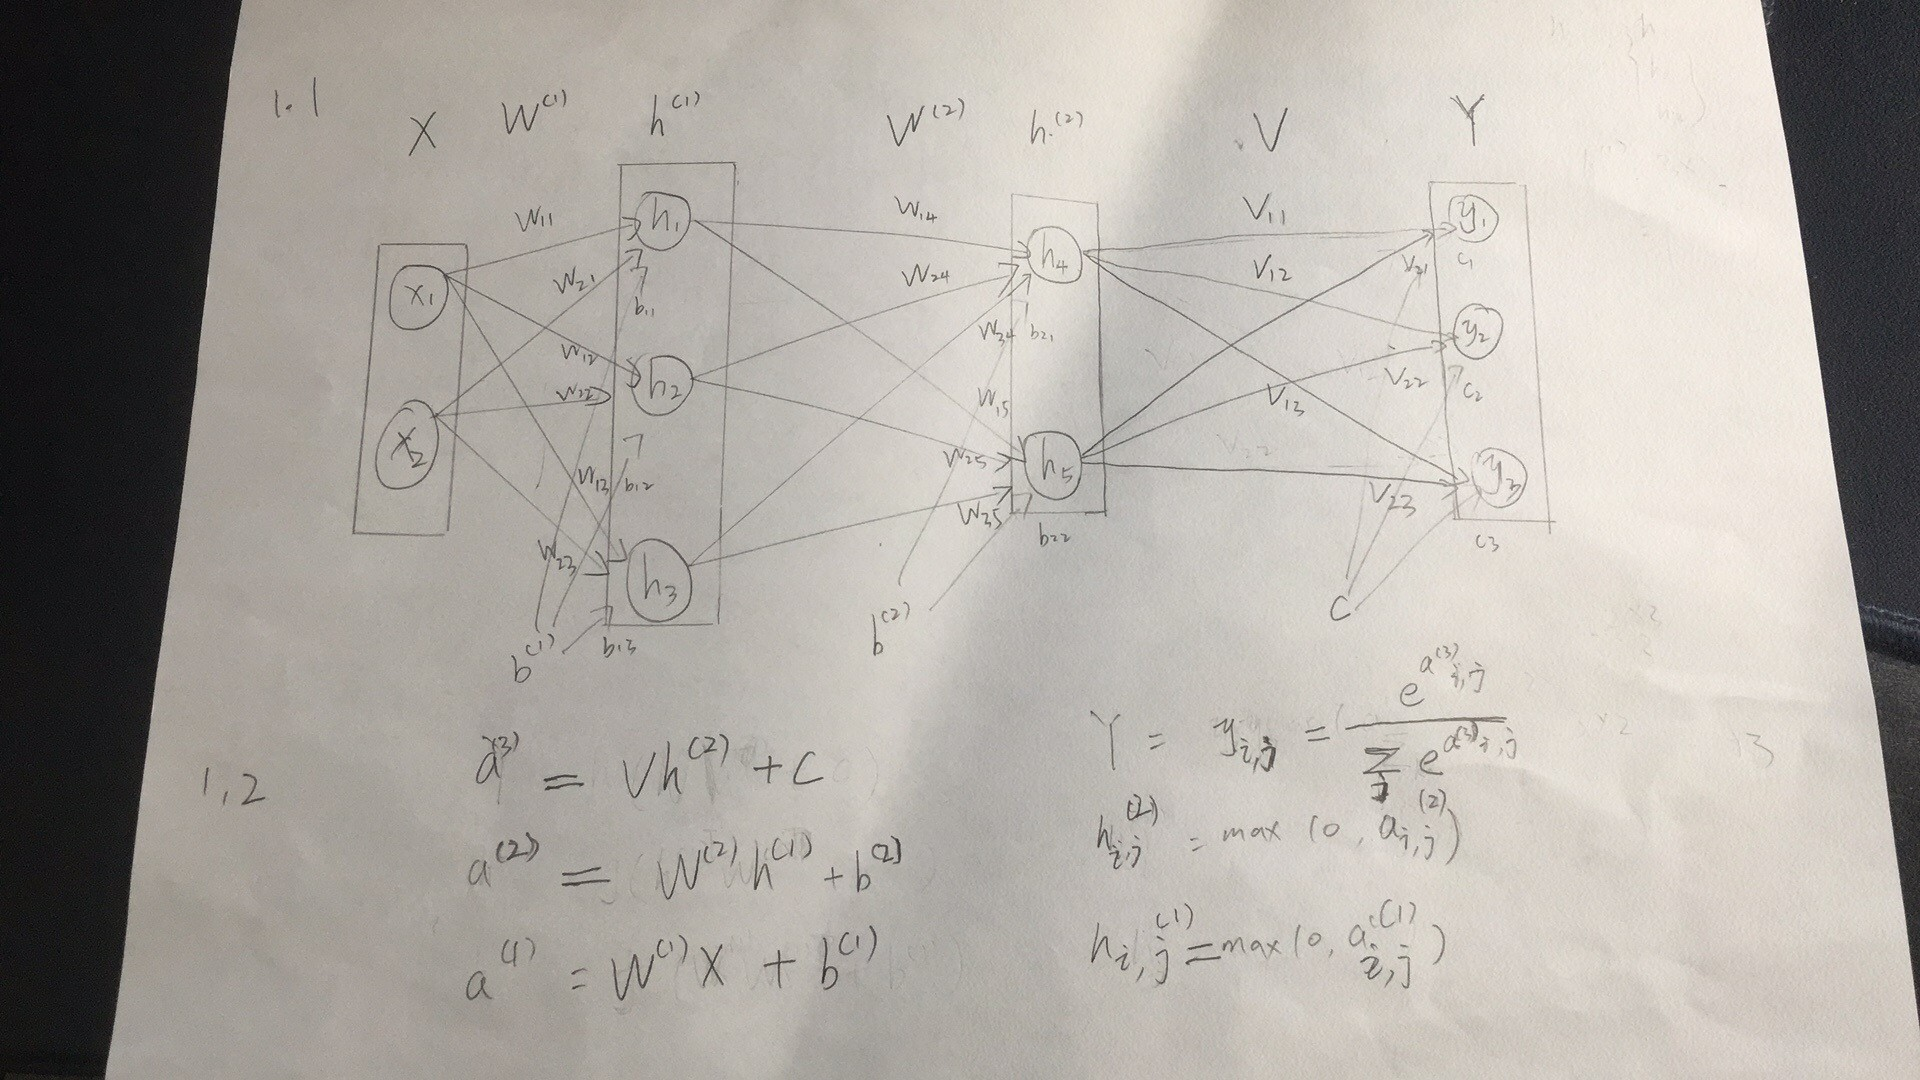

In [1]:
from IPython.display import Image
Image(filename='picture.jpg')

It's $$\sum_{i} e^{{a^{(3)}}_{i,j}}$$

The sum of each column of the y matrix equals 1.

In [2]:
# 1.3

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=0))[np.newaxis,:]
 




def ff_nn_2_ReLu(x, w1,w2, v, b1, b2,c):
    a1 = np.dot(w1,x) + b1
    H = relu(a1)
    a2 = np.dot(w2,H) + b2
    G = relu(a2)
    a3 = np.dot(v,G) + c
    Y_hat = softmax(a3)
    return Y_hat



In [3]:
# 1.4 

x = np.array([[1,0,0],[-1,-1,1]])
w1 = np.array([[1,0],[-1,0],[0,0.5]])
w2 = np.array([[1,0,0],[-1,-1,0]])
v = np.array([[1,1],[0,0],[-1,-1]])
b1 = np.array([[0],[0],[1]])
b2 = np.array([[1],[-1]])
c=np.array([[1],[0],[0]])


In [4]:
ff_nn_2_ReLu(x,w1,w2,v,b1,b2,c)

array([[ 0.94649912,  0.84379473,  0.84379473],
       [ 0.04712342,  0.1141952 ,  0.1141952 ],
       [ 0.00637746,  0.04201007,  0.04201007]])

### 2.Gradient Descent 

In [5]:
from sympy import symbols, diff

In [6]:
#2.1
x,y = symbols('x y', real = True)
f = (1-x)**2 + 100*(y-x**2)**2
#partial derivative resepect to x
diff(f,x)

-400*x*(-x**2 + y) + 2*x - 2

In [7]:
#partial derivative resepect to y
diff(f,y)

-200*x**2 + 200*y

$$\frac{\partial f}{\partial x} = -400x^3-400y +2x -2$$


$$\frac{\partial f}{\partial y} = -200x^2+200y$$

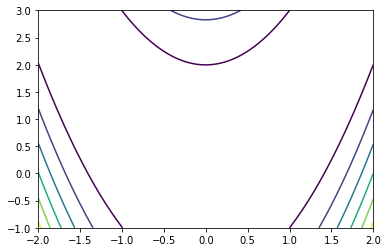

In [8]:
#2.2
x1 = np.linspace(-2, 2, 1000)
y1 = np.linspace(-1, 3, 1000)
X, Y = np.meshgrid(x1, y1)
Z = (1-X)**2 + 100*(Y-X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

In [9]:
#2.3 
def grad_f2(vector):
    x, y = vector
    df_dx = -400*x*(-x**2 + y) + 2*x - 2 
    df_dy = -200*x**2 + 200*y
    return np.array([df_dx, df_dy])

In [10]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-3,3,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f2(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

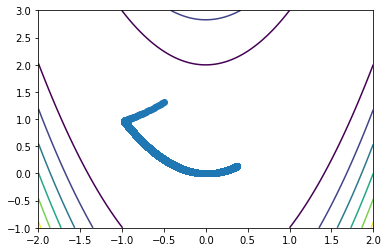

In [11]:
np.random.seed(1)
traj = grad_descent(iterations=10000,learning_rate = 0.0001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

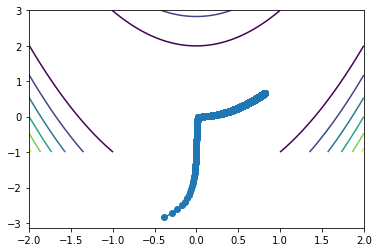

In [12]:
np.random.seed(2)
traj1 = grad_descent(iterations=10000,learning_rate = 0.0002)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x3= traj1[:,0]
y3= traj1[:,1]
plt.plot(x3,y3,'-o')

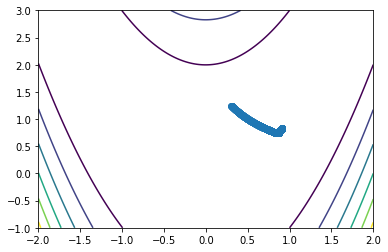

In [13]:
np.random.seed(3)
traj = grad_descent(iterations=100000,learning_rate = 0.00001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

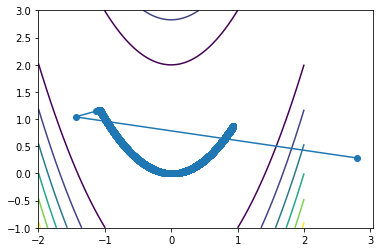

In [14]:
np.random.seed(4)
traj = grad_descent(iterations=10000,learning_rate = 0.0005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

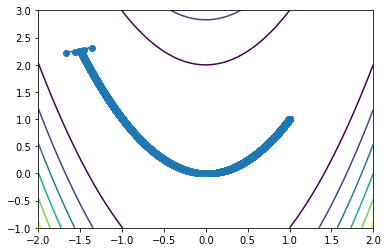

In [15]:
np.random.seed(5)
traj = grad_descent(iterations=100000, learning_rate = 0.0008)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

It all converges to 1 except for the first one with learning rate 0.0001. And it looks like with smaller learning rate, it converges faster. 

In [16]:
#2.4
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-3,3,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f2(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

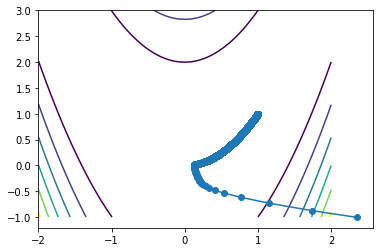

In [17]:
np.random.seed(6)
traj = grad_descent_with_momentum(iterations=100000, epsilon=0.0001, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

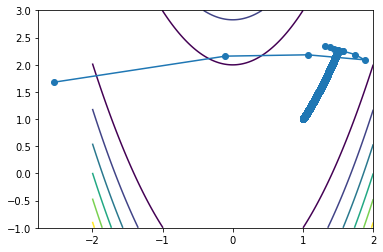

In [18]:
np.random.seed(7)
traj = grad_descent_with_momentum(iterations=100000, epsilon=0.0005, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

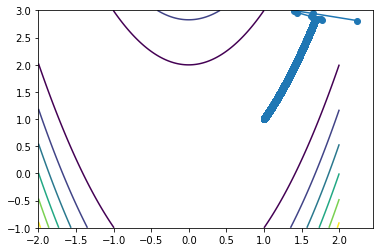

In [19]:
np.random.seed(8)
traj = grad_descent_with_momentum(iterations=100000, epsilon=0.0003, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

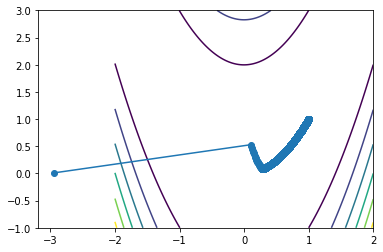

In [20]:
np.random.seed(9)
traj = grad_descent_with_momentum(iterations=100000, epsilon=0.0003, alpha=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

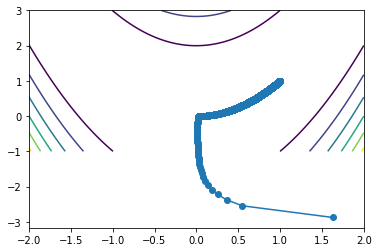

In [21]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100000, epsilon=0.0003, alpha=0.0001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

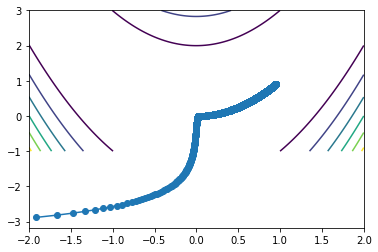

In [22]:
np.random.seed(11)
traj = grad_descent_with_momentum(iterations=100000, epsilon=0.00005, alpha=0.00005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

We keep epsilon same, and lower alpha, it converges faster.
We keep alpha same, and make epsilon bigger, it converges faster.
We make alpha and epsilon both bigger, it converges faster.

### 3 Backprop 

#3.1

Loss function:

$$L = -  \sum_{j} y_j log(\hat{y_j})$$

Define the ReLu function as t(x) where x >0 then t(x) = 1 else t(x) = 0.



$$\frac{\partial L}{\partial V}= \frac{\partial L}{\partial a^{(3)}} \cdot \frac{\partial a^{(3)}}{\partial V} =  (\hat{Y}-Y) \cdot h^{(2)}$$<br>
$$\frac{\partial L}{\partial C}= \frac{\partial L}{\partial a^{(3)}} \cdot \frac{\partial a^{(3)}}{\partial C} = (\hat{Y}-Y)$$<br>
$$\frac{\partial L}{\partial W^{(2)}}= \frac{\partial L}{\partial a^{(3)}} \cdot \frac{\partial a^{(3)}}{\partial h^{(2)}} \cdot  \frac{\partial h^{(2)}}{\partial a^{(2)}} \cdot \frac{\partial a^{(2)}}{\partial W^{(2)}} = (\hat{Y}-Y) \cdot V \cdot t(h^{(2)}) \cdot h^{(1)}$$<br>
$$\frac{\partial L}{\partial b^{(2)}}= \frac{\partial L}{\partial a^{(3)}} \cdot \frac{\partial a^{(3)}}{\partial h^(2)} \cdot  \frac{\partial h^(2)}{\partial a^{(2)}} \cdot \frac{\partial a^{(2)}}{\partial b^{(2)}} = (\hat{Y}-Y) \cdot V \cdot t(h^{(2)})$$<br>
$$\frac{\partial L}{\partial W^{(1)}}= \frac{\partial L}{\partial a^{(3)}} \cdot \frac{\partial a^{(3)}}{\partial h^{(2)}} \cdot  \frac{\partial h^(2)}{\partial a^{(2)}} \cdot  \frac{\partial a^{(2)}}{\partial h^{(1)}} \cdot \frac{\partial h^{(1)}}{\partial a^{(1)}} \cdot \frac{\partial a^{(1)}}{\partial W^{(1)}} = (\hat{Y}-Y) \cdot V \cdot t(h^{(2)}) \cdot W^{(2)} \cdot t(h^{(1)}) \cdot X$$<br>

$$\frac{\partial L}{\partial b^{(1)}}= \frac{\partial L}{\partial a^{(3)}} \cdot \frac{\partial a^{(3)}}{\partial h^{2}} \cdot  \frac{\partial h^{(2)}}{\partial a^{(2)}} \cdot  \frac{\partial a^{(2)}}{\partial h^{(1)}} \cdot \frac{\partial h^{(1)}}{\partial a^{(1)}} \cdot \frac{\partial a^{(1)}}{\partial b^{(1)}} = (\hat{Y}-Y) \cdot V \cdot t(h^{(2)}) \cdot W^{(2)} \cdot t(h^{(1)})$$<br>

In [23]:
#3.2

def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()

def relu(x):
    return np.maximum(x,0)


def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=0))[np.newaxis,:]
 


def ff_nn_2_ReLu(x, w1,w2, v, b1, b2,c):
    a1 = w1.dot(x) + b1
    H = relu(a1)
    a2 = w2.dot(H) + b2
    G = relu(a2)
    a3 = v.dot(G) + c
    Y_hat = softmax(a3)
    return Y_hat

def unpack_params(w1,w2,v,b1,b2,c):
    w_11, w_21, w_12,w_22, w_13, w_23= w1[0,0], w1[0,1],w1[1,0], w1[1,1], w1[2,0],w1[2,1]
    w_14,w_24,w_34,w_15,w_25,w_35 = w2[0,0],w2[0,1],w2[0,2],w2[1,0],w2[1,1],w2[1,2]
    b_11, b_12, b_13 = np.squeeze(b1[0]), np.squeeze(b1[1]), np.squeeze(b1[2]) 
    b_21,b_22 = np.squeeze(b2[0]), np.squeeze(b2[1])
    v_11, v_21, v_12, v_22, v_13, v_23 = v[0,0], v[0,1], v[1,0], v[1,1], v[2,0], v[2,1]
    c_1, c_2, c_3 = np.squeeze(c[0]), np.squeeze(c[1]), np.squeeze(c[2])
    return np.array([w_11, w_12, w_13,w_21, w_22,w_23, w_14, w_15, w_24, w_25, w_34,w_35,b_11, b_12,b_13,b_21,b_22,v_11, v_12, v_13, v_21, v_22, v_23, c_1, c_2, c_3])

def pack_params(param_vec):
    w_11, w_12, w_13,w_21, w_22,w_23, w_14, w_15, w_24, w_25, w_34,w_35,b_11, b_12,b_13,b_21,b_22,v_11, v_12, v_13, v_21, v_22, v_23, c_1, c_2, c_3 = param_vec
    w1 = np.array([[w_11,w_21],[w_12,w_22],[w_13,w_23]])
    w2 = np.array([[w_14,w_24,w_34],[w_15,w_25,w_35]])
    b1 = np.array([[b_11], [b_12],[b_13]])
    b2 = np.array([[b_21],[b_22]])
    v = np.array([[v_11, v_21],[v_12, v_22],[v_13, v_23]])
    c = np.array([[c_1], [c_2], [c_3]])
    return (w1,w2,v,b1,b2,c)
    



def grad_f(param_vec,x,Y):
    x = x.T
    w1,w2,v,b1,b2,c =pack_params(param_vec)
    
    a1 = w1.dot(x) + b1
    H = relu(a1)
    a2 = w2.dot(H) + b2
    G = relu(a2)
    a3 = v.dot(G) + c
    Y_hat = softmax(a3).T
    
    d_v = G.dot((Y_hat-Y)).T
    d_c = (Y_hat-Y).sum(axis = 0).reshape(3,1)
    d_w2 = (((Y_hat-Y).dot(v)).T * (G > 0)).dot(H.T)
    d_b2 = (((Y_hat - Y).dot(v)).T * (G > 0)).sum(axis=1).reshape(2,1)
    d_w1 = ((w2.T.dot(  (((Y_hat-Y).dot(v)).T * (G > 0))  )) * (H > 0)).dot(x.T)
    d_b1 = ((w2.T.dot(  (((Y_hat-Y).dot(v)).T * (G > 0))  )) * (H > 0)).sum(axis = 1).reshape(3,1)
    
    param_vec = unpack_params(d_w1, d_w2, d_v, d_b1, d_b2, d_c)
    
    return np.array(param_vec)

In [24]:
#3.3

def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
            
        # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl

In [25]:
x,y,cl = gen_gmm_data(700)

In [26]:
y.shape

(699, 3)

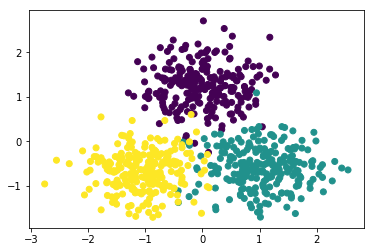

In [27]:
plt.scatter(x[:,0], x[:,1],c = cl.ravel())

In [28]:
#3.4
def grad_descent1(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=26).astype("float")
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x.T, *pack_params(point)).T)]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x.T, *pack_params(point)).T))
    return (np.array(trajectory), losses)

In [29]:
w1 = np.random.randn(6).reshape((3,2))
w2 = np.random.randn(6).reshape((2,3))
b1 = np.random.randn(3).reshape(3,1)
b2 = np.random.randn(2).reshape(2,1)
v = np.random.randn(6).reshape((3,2))
c = np.random.randn(3).reshape(3,1)

In [30]:
traj1, losses = grad_descent1(x, y, iterations=1000,learning_rate=1e-4)

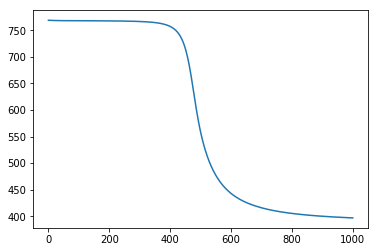

In [31]:
plt.plot(losses)

In [32]:
#3.5
def grad_descent_with_momentum1(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=1e-4):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=26).astype("float")
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x.T, *pack_params(point)).T)]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x.T, *pack_params(point)).T))
    return (np.array(trajectory), losses)



In [33]:
traj, losses = grad_descent_with_momentum1(x, y, iterations=1000,alpha=.4, epsilon = 1e-4)

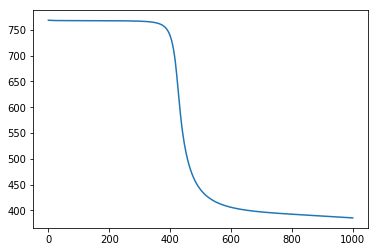

In [34]:
plt.plot(losses)

It does converge earlier than Gradient Descent